# Machine learning for Predicting the new Heart Diseases cases

In this kernel I have performed Exploratory Data Analysis on the Heart Diseases UCI and tried to identify relationship between heart disease  and various other features. After EDA data pre-processing is done I have applied k-NN(k-Nearest Neighbors) method and Logistic Regression Algorithm to make the predictions.
I will use various other algorithms for predictions in future and add them in this kernel.

<h1>About Heart Disease</h1>Heart disease is a general term that means that the heart is not working normally. Babies can be born with heart disease. This is called congenital heart disease. If people get heart disease later, it is called acquired heart disease. Most heart disease is acquired.
The three most common types of acquired heart disease are:

<li><b>Coronary Artery Disease (acronym CAD)</b></li> 
<li><b>Congestive Heart Failure (CHF)</b></li>
<li><b>Bad Heart Rhythms</b>


<br>
<h3>Deaths</h3></li>
<p>Heart disease is the biggest killer of both men and women in the United States, England, Wales, and Canada. For example, heart disease causes 4 out of every 10 deaths in the United States.This is more than all kinds of cancer put together. Also, one person dies of heart disease about every minute in the United States alone.</p>

In [11]:
#from azureml import Workspace
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Deep Learning Libraries
from keras.models import Sequential
from keras.layers import Dense,Dropout

# Misc. Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix,f1_score,precision_score,recall_score,accuracy_score




%matplotlib inline

#ws = Workspace()
df = pd.read_csv('D:\\heart.csv')


In [12]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The dataset contains the following features:<br>
**1. age(in years)**<br>
**2. sex:** (1 = male; 0 = female)<br>
**3. cp:** chest pain type<br>
**4. trestbps:** resting blood pressure (in mm Hg on admission to the hospital)<br>
**5. chol:** serum cholestoral in mg/dl<br>
**6. fbs:** (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
**7. restecg:** resting electrocardiographic results<br>
**8. thalach:** maximum heart rate achieved<br>
**9. exang:** exercise induced angina (1 = yes; 0 = no)<br>
**10. oldpeak**: ST depression induced by exercise relative to rest<br>
**11. slope:** the slope of the peak exercise ST segment<br>
**12. ca:** number of major vessels (0-3) colored by flourosopy<br>
**13. thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
**14. target:** 1 or 0 <br>

### **Features of the data set**

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Dimensions of the dataset**

In [15]:
print('Number of rows in the dataset: ',df.shape[0])
print('Number of columns in the dataset: ',df.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There are no null values in the dataset

In [17]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**The features described in the above data set are:**

**1. Count** tells us the number of NoN-empty rows in a feature.<br>

**2. Mean** tells us the mean value of that feature.<br>

**3. Std** tells us the Standard Deviation Value of that feature.<br>

**4. Min** tells us the minimum value of that feature.<br>

**5. 25%**, **50%**, and **75%** are the percentile/quartile of each features.<br>

**6. Max** tells us the maximum value of that feature.<br>


### **Checking features of various attributes**

#### **1. Sex**

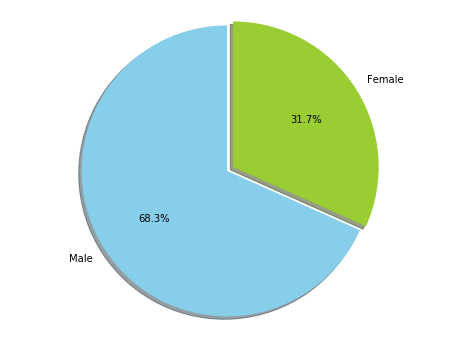

In [18]:
male =len(df[df['sex'] == 1])
female = len(df[df['sex']== 0])

plt.figure(figsize=(8,6))

# Data to plot
labels = 'Male','Female'
sizes = [male,female]
colors = ['skyblue', 'yellowgreen']
explode = (0,0.05)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

#### **2. Chest Pain Type**

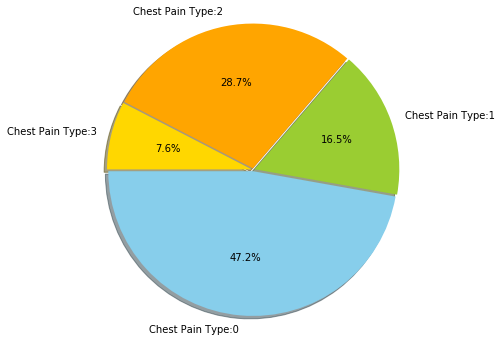

In [19]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(df[df['cp'] == 0]),len(df[df['cp'] == 1]),
         len(df[df['cp'] == 2]),
         len(df[df['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.01, 0.01,0.01,0.01)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

#### **4.exang: exercise induced angina (1 = yes; 0 = no)**

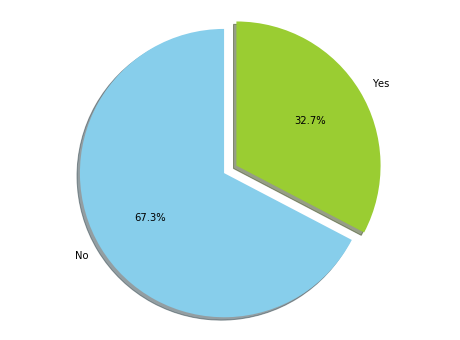

In [20]:
plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(df[df['exang'] == 0]),len(df[df['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.axis('equal')
plt.show()

### **Exploratory Data Analysis**

In [21]:
sns.set_style('whitegrid')

#### **1. Heatmap**

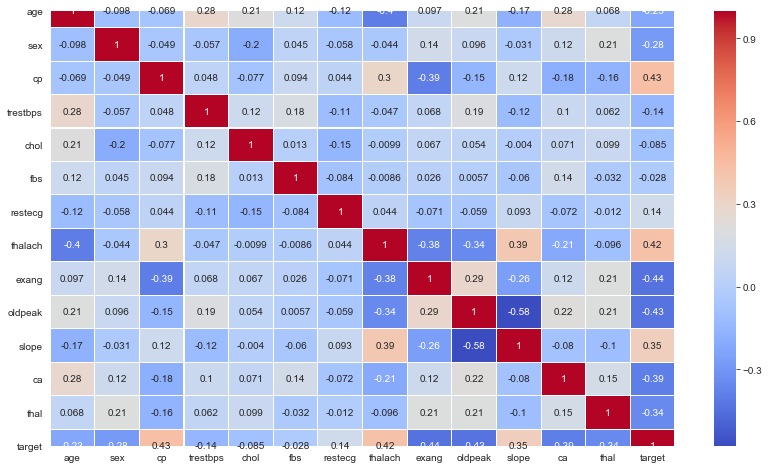

In [22]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot = True, cmap='coolwarm',linewidths=.1)
plt.show()

#### **Plotting the distribution of various attribures**

#### **1. thalach: maximum heart rate achieved**

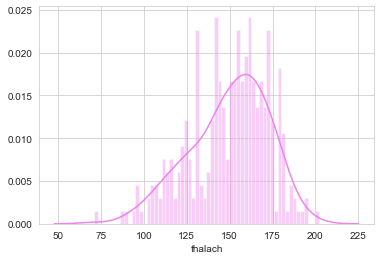

In [23]:
sns.distplot(df['thalach'],kde=True,bins=60,color='violet')

#### **2.chol: serum cholestoral in mg/dl **

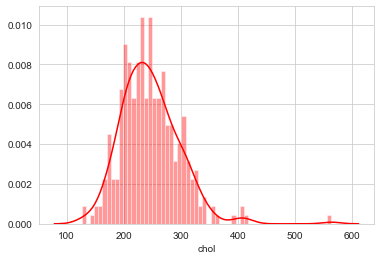

In [24]:
sns.distplot(df['chol'],kde=True,bins=60,color='red')
plt.show()

#### **3. trestbps: resting blood pressure (in mm Hg on admission to the hospital)**

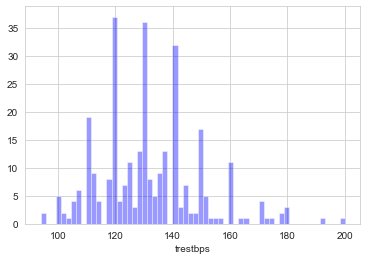

In [25]:
sns.distplot(df['trestbps'],kde=False,bins=60,color='blue')
plt.show()

#### **4. Number of people who have heart disease according to age **

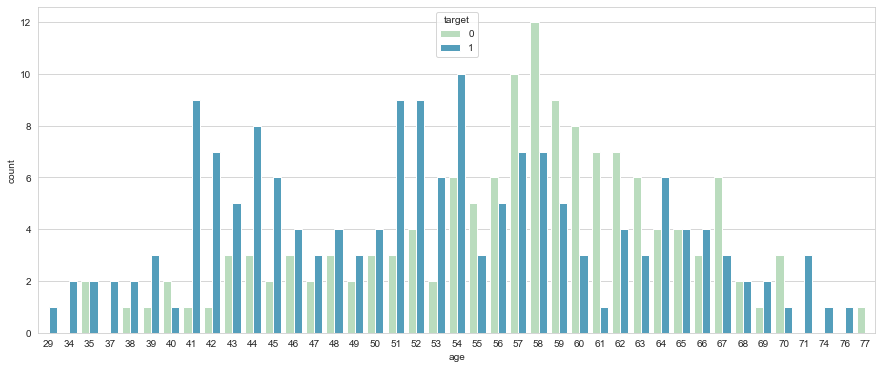

In [26]:
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = df, hue = 'target',palette='GnBu')
plt.show()

#### **5.Plot for thalach vs. chol **

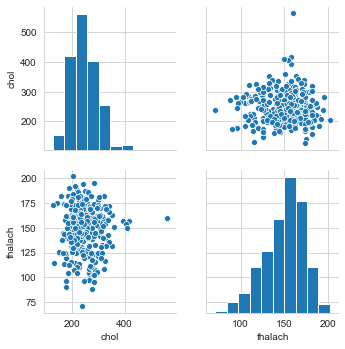

In [27]:
#sns.scatterplot(x='trestbps',y='thalach',data=df,hue='target')


# without regression
sns.pairplot(df[["chol","thalach"]], kind="scatter")
plt.show()


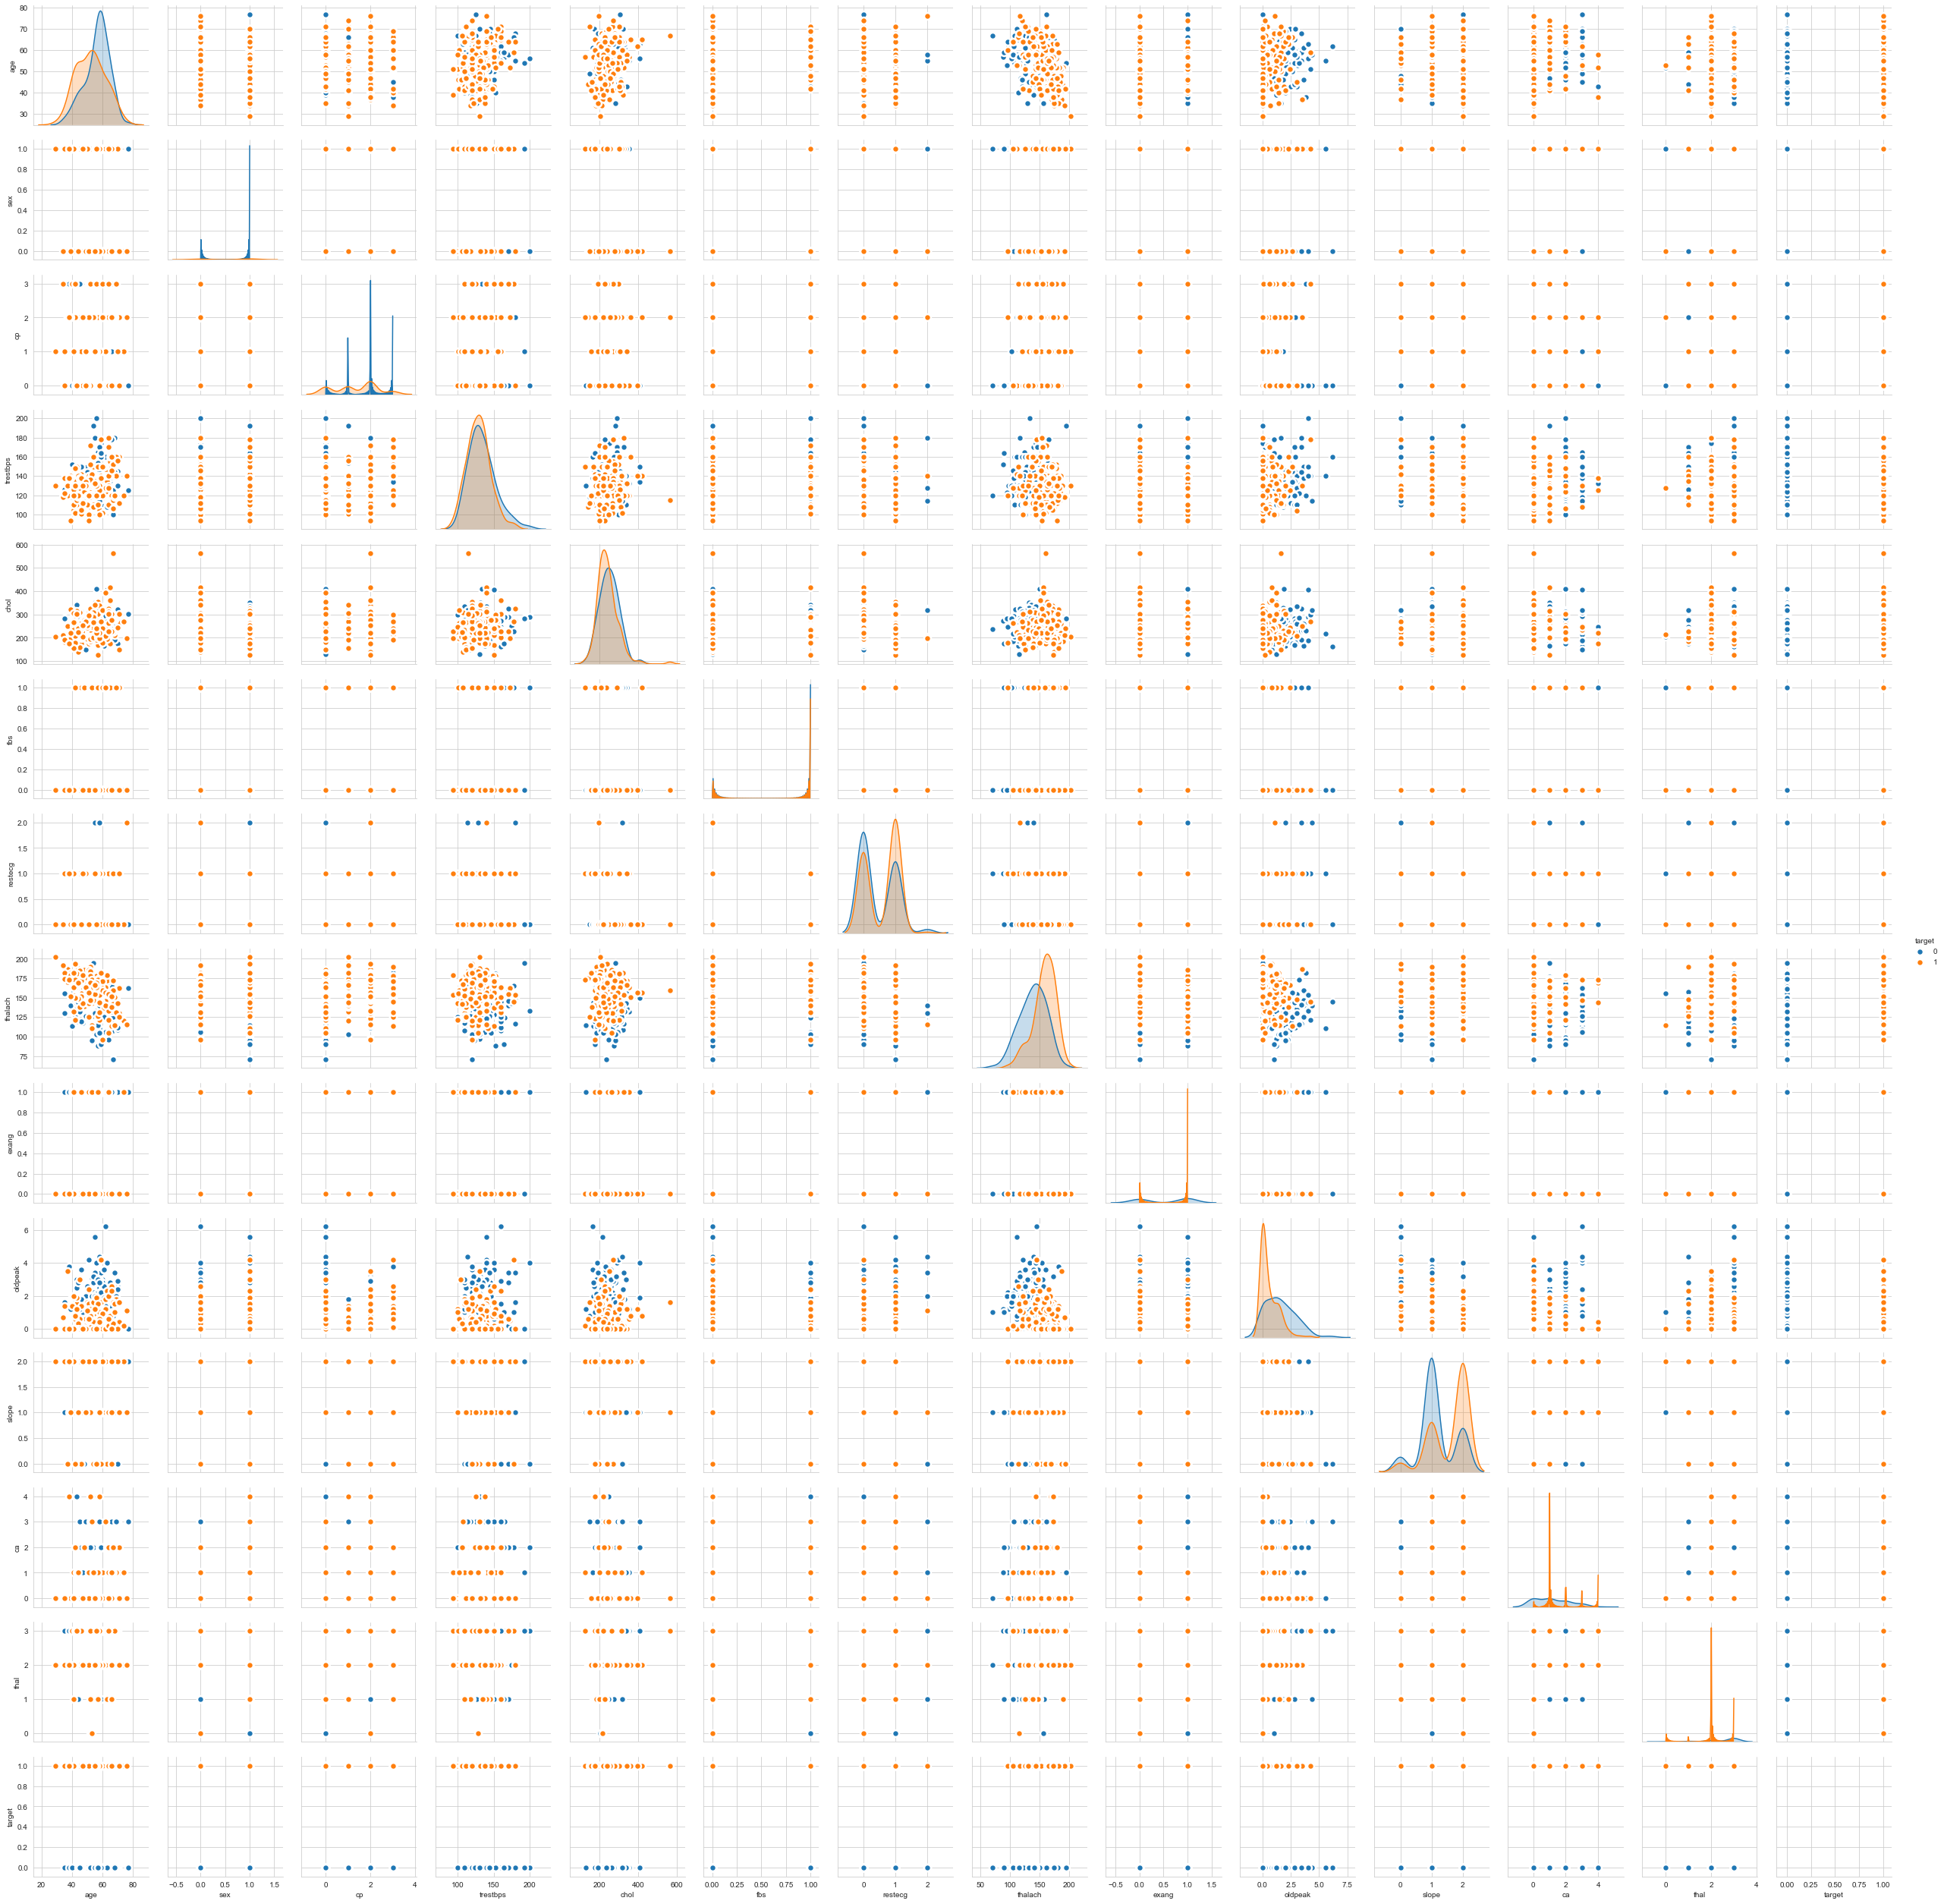

In [28]:
sns.pairplot(df, kind="scatter", hue="target", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()


In [29]:
df[["chol","thalach"]][1:20]

,chol,thalach
1,250,187
2,204,172
3,236,178
4,354,163
5,192,148
6,294,153
7,263,173
8,199,162
9,168,174
10,239,160


### **Making Predictions**

**Splitting the dataset into training and test set**

In [30]:
X= df.drop('target',axis=1)
y=df['target']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

**Preprocessing - Scaling the features**

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

## All methods

In [34]:
classifiers = { "RandomForestClassifier" :  RandomForestClassifier(),
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  RandomForestClassifier Has a training score of 81.0 % accuracy score
Classifiers:  LogisticRegression Has a training score of 82.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 81.0 % accuracy score
Classifiers:  SVC Has a training score of 82.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 76.0 % accuracy score


**1. Using Random Forest and then using GridSearch CV to find the best parameter**

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred=model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8688524590163934

In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[1,500], 'max_depth':[1, 15]}
clf = GridSearchCV(model, parameters, cv=5)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'max_depth': 1, 'n_estimators': 500}


*Using the parameter achieved from the GridSearch to*

In [38]:
model = RandomForestClassifier(n_estimators=500,max_depth=1)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test.tolist(),y_pred.tolist())


In [39]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision Score :",precision_score(y_test,y_pred))
print("f1 Score :",f1_score(y_test,y_pred))
print("Confusion Matrix: \n",cm)


Accuracy: 0.8852459016393442
Precision Score : 0.8571428571428571
f1 Score : 0.8955223880597014
Confusion Matrix: 
 [[24  5]
 [ 2 30]]


In [40]:
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.9230769230769231
Specificity :  0.8571428571428571


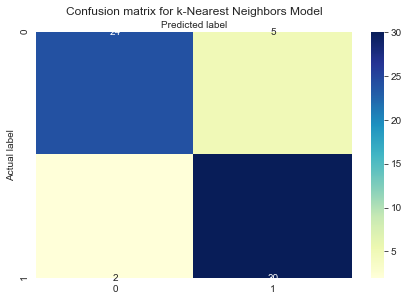

In [41]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cm), annot = True, cmap = 'YlGnBu',  fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Classification report**

In [42]:
from sklearn.metrics import classification_report

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87        29
           1       0.86      0.94      0.90        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



**Receiver Operating Characterstic(ROC) Curve**

In [44]:
from sklearn.metrics import roc_auc_score,roc_curve

In [45]:
y_probabilities = model.predict_proba(X_test)[:,1]

In [46]:
#Create true and false positive rates
false_positive_rate_FR,true_positive_rate_FR,threshold_FR = roc_curve(y_test,y_probabilities)

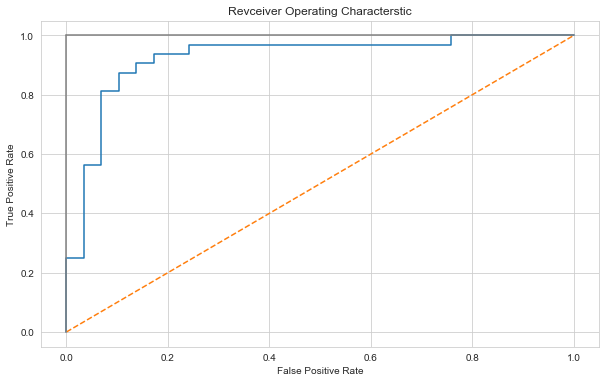

In [47]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_FR,true_positive_rate_FR)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**2. k-Nearest Neighor Algorithm**

**Implementing GridSearchCv to select best parameters and applying k-NN Algorithm**

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn =KNeighborsClassifier()
params = {'n_neighbors':[i for i in range(1,33,2)]}

In [49]:
model = GridSearchCV(knn,params,cv=10)

In [50]:
model.fit(X_train,y_train)
model.best_params_           #print's parameters best values

{'n_neighbors': 27}

**Making predictions**

In [51]:
predict = model.predict(X_test)

**Checking accuracy**

In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using k-NN we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8852459016393442
Using k-NN we get an accuracy score of:  88.52499999999999 %


**Confusion Matrix**

In [53]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[25,  4],
       [ 3, 29]], dtype=int64)

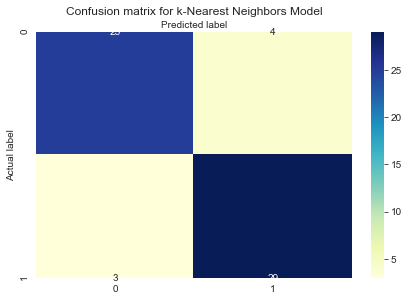

In [54]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',  fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for k-Nearest Neighbors Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Classification report**

In [55]:
from sklearn.metrics import classification_report

In [56]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



**Receiver Operating Characterstic(ROC) Curve**

In [57]:
from sklearn.metrics import roc_auc_score,roc_curve

In [58]:
#Get predicted probabilites from the model
y_probabilities = model.predict_proba(X_test)[:,1]

In [59]:
#Create true and false positive rates
false_positive_rate_knn,true_positive_rate_knn,threshold_knn = roc_curve(y_test,y_probabilities)

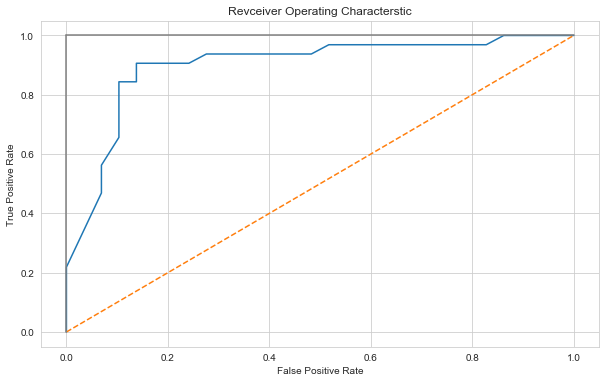

In [60]:
#Plot ROC Curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn,true_positive_rate_knn)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [61]:
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8987068965517242

## **3. Logistic Regression**

In [62]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [63]:
# Setting parameters for GridSearchCV
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
log_model = GridSearchCV(log,param_grid=params,cv=10)

In [64]:
log_model.fit(X_train,y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [65]:
# Printing best parameters choosen through GridSearchCV
log_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

**Making predictions**

In [66]:
predict = log_model.predict(X_test)

**Accuracy Metrics**

In [67]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Logistic Regression we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.8524590163934426
Using Logistic Regression we get an accuracy score of:  85.246 %


In [68]:
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Confusion Matrix

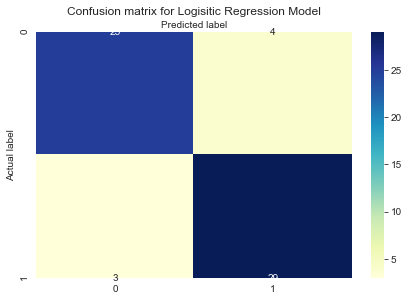

In [69]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Logisitic Regression Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

*Receiver Operating Characterstic(ROC) Curve*

In [70]:
#Get predicted probabilites
target_probailities_log = log_model.predict_proba(X_test)[:,1]

In [71]:
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)

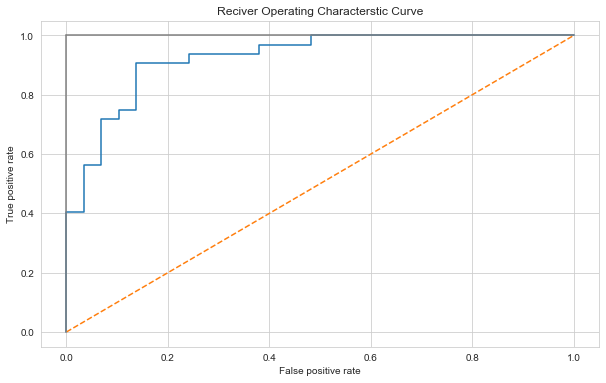

In [72]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [73]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_log)

0.9245689655172413

**4. Decision Tree**

In [74]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [75]:
#Setting parameters for GridSearchCV
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_model = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [76]:
tree_model.fit(X_train,y_train)
#Printing best parameters selected through GridSearchCV
tree_model.best_params_

{'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 3}

**Making predictions**

In [77]:
predict = tree_model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,predict))
print('Using Decision Tree we get an accuracy score of: ',
      round(accuracy_score(y_test,predict),5)*100,'%')

Accuracy Score:  0.7213114754098361
Using Decision Tree we get an accuracy score of:  72.131 %


In [79]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

**Classification Report**

In [80]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.68      0.79      0.73        29
           1       0.78      0.66      0.71        32

    accuracy                           0.72        61
   macro avg       0.73      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



**Confusion Matrix**

In [81]:
cnf_matrix = confusion_matrix(y_test,predict)
cnf_matrix

array([[23,  6],
       [11, 21]], dtype=int64)

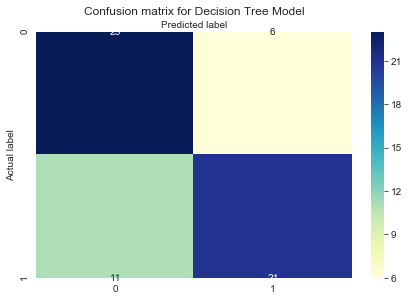

In [82]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Receiver Operating Characterstic(ROC) Curve**

In [83]:
#Get predicted probabilites
target_probailities_tree = tree_model.predict_proba(X_test)[:,1]

In [84]:
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)

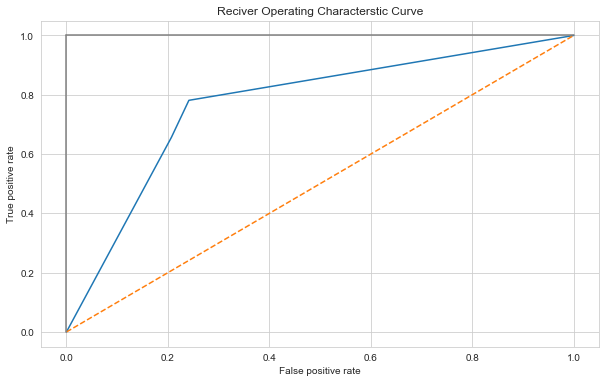

In [85]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [86]:
#Calculate area under the curve
roc_auc_score(y_test,target_probailities_tree)

0.7683189655172413

# 6. Support vector Classifier

In [88]:
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics

In [89]:
# SVM Parameter Tuning in Scikit Learn using GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [90]:
scv_model = svc_param_selection(X_train, y_train,5)

In [91]:
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8688524590163934


In [92]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8688524590163934


In [93]:
svc=SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.8688524590163934


In [94]:
svc=SVC(kernel='poly')
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

Accuracy Score:
0.9016393442622951


In [95]:
#from sklearn.cross_validation import cross_val_score
#svc=SVC(kernel='poly')
#scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy') #cv is cross validation
#print(scores)

In [96]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print('Using SVC with polynomial kernel we get an accuracy score of: ',
      round(accuracy_score(y_test,y_pred),5)*100,'%')

Accuracy Score:  0.9016393442622951
Using SVC with polynomial kernel we get an accuracy score of:  90.164 %


**Confusion Matrix**

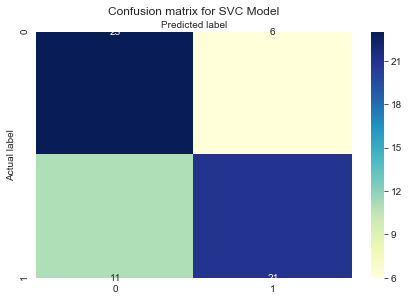

In [97]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for SVC Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**C value and checking out the accuracy score with kernel as polynomial**.

The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points.

Thus for a very large values we can cause overfitting of the model and for a very small value of C we can cause underfitting.Thus the value of C must be chosen in such a manner that it generalised the unseen data well

In [98]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [99]:
C_range=list(range(1,26))
acc_score=[]
for c in C_range:
    svc = SVC(kernel='poly', C=c)
    scores = cross_val_score(svc, X, y, cv=10, scoring='accuracy')
    acc_score.append(scores.mean())
print(acc_score)    

[0.663763440860215, 0.6735483870967741, 0.6901075268817205, 0.6803225806451614, 0.676989247311828, 0.6835483870967741, 0.6867741935483871, 0.6867741935483871, 0.6901075268817205, 0.6935483870967741, 0.6935483870967741, 0.6935483870967741, 0.6967741935483871, 0.7066666666666668, 0.7033333333333334, 0.7065591397849462, 0.7065591397849462, 0.7065591397849462, 0.7065591397849462, 0.7065591397849462, 0.7131182795698925, 0.7196774193548386, 0.7163440860215053, 0.713010752688172, 0.713010752688172]


** Comparing ROC Curve of Forest Random, k-Nearest Neighbors, Logistic Regression and Decision Tree**

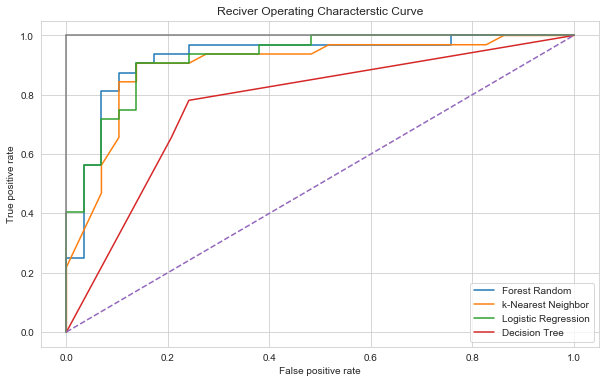

In [100]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(false_positive_rate_FR,true_positive_rate_FR,label='Forest Random')
plt.plot(false_positive_rate_knn,true_positive_rate_knn,label='k-Nearest Neighbor')
plt.plot(log_false_positive_rate,log_true_positive_rate,label='Logistic Regression')
plt.plot(tree_false_positive_rate,tree_true_positive_rate,label='Decision Tree')
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()

<h1> Using Grid Search CV to find the best parameters 

In [101]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [102]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  81.8%
Knears Neighbors Cross Validation Score 80.58%
Support Vector Classifier Cross Validation Score 82.24%
DecisionTree Classifier Cross Validation Score 78.1%


In [103]:
X_train.shape

(242, 13)

In [104]:
model=Sequential()
model.add(Dense(128, init="uniform", input_dim=13, activation='relu'))
model.add(Dense(64, init ="uniform", activation="relu"))
model.add(Dense(1, init="uniform", activation="sigmoid"))
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer='adam')
model.summary()
history=model.fit(X_train,y_train, epochs=100, batch_size=100)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5702
Epoch 2/100
242/242 [==============================] - 0s 45us/step - loss: 0.6890 - accuracy: 0.8140
Epoch 3/100
242/242 [==============================] - 0s 37us/step - loss: 0.6842 - accuracy: 0.8264
Epoch 4/100
242/242 [==============================] - 0s 50us/step - loss:

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Activation

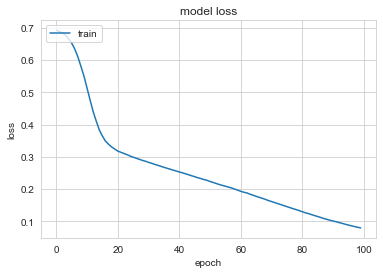

In [106]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [107]:
model.evaluate(X_test,y_test)

61/61 [==============================] - 0s 966us/step


[0.7342934940682083, 0.8360655903816223]